In [2]:
from dataclasses import dataclass, field

from typing import Dict, List, Tuple, Optional, Callable, Any

import math
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment


# %matplotlib ipympl

In [133]:
sbs = np.array([
    [0, 5],
    [0, 10],
    [0, 15],
    [10, 5],
    [10, 10],
    [10, 15],
    [20, 5],
    [20, 10],
    [20, 15],
])
M, K = sbs.shape[0], 200
H, W = 20, 20
S_min, S_max = 0.15, 0.75

obj = np.random.rand(K, 2)*np.array([H, W])
sizes = np.random.rand(K)*(S_max - S_min) + S_min

In [152]:
def _distance(o, m):
    return np.sqrt(np.sum((o-m)**2))

def _probability(o, m, s, epsilon=1e-6):
    d = _distance(o, m)
    # print(d, np.arctan(W/np.sqrt(np.abs(d - W**2))), np.arcsin(np.sqrt(np.abs(d-H**2))/H))
    temp = (2*d*1.5) * (np.pi + np.arctan(W/np.sqrt(np.abs(d**2 - W**2))) - 2*np.arcsin(np.sqrt(np.abs(d**2-H**2))/H)) / (W*H)**2
    # print(d, s, temp)
    return temp

# calculate probability of NLOS for each object according to each BS
probabilities = [
    np.array([_probability(o, m, s) for o, s in zip(obj, sizes)])
    for m in sbs
]

ks = [5, 10, 25, 50]
ret = []
for m in range(len(probabilities)):
    loses = []
    for k in ks:
        loses.append(
            1 - np.prod([1 - (1 - prob.mean())**(150+k) for prob in probabilities][0:m+1], axis=0)
        )
    ret.append(np.array(loses)*100)
    # los = 1 - np.prod([1 - (1 - prob[0:50].mean())**K for prob in probabilities][0:m+1], axis=0)
    # print(los)

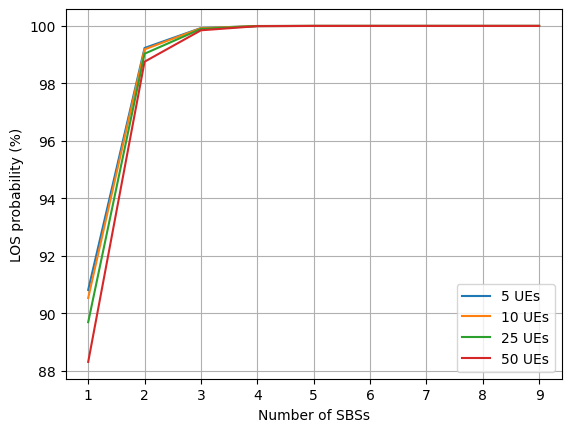

In [153]:
ys = [1, 2]

for i, k in enumerate(ks):
    plt.plot([n+1 for n in range(len(ret))], [xs[i] for xs in ret], label=f"{k} UEs") 
    # plt.plot(y, x, label=f"{}") 
plt.legend()
plt.xlabel("Number of SBSs")
plt.ylabel("LOS probability (%)")
plt.grid(True)
plt.show()